# **Name: Rutuja Avinash Chabukswar**


# **Roll No : DS24MS26**

# **Project: Airline Passenger Referral Prediction**

## **Project Description:**


In the dynamic and highly competitive airline industry, companies like IndiGo are continuously
striving to enhance customer experience and build lasting loyalty. A critical component of this
effort is understanding and predicting passenger referrals, which can significantly influence the
airline's market position and reputation. The analysis of passenger reviews from 2006 to 2019
offers IndiGo a comprehensive view into the various facets of the travel experience as perceived
by their customers. These reviews provide invaluable feedback on service quality, including
comfort, service, and overall value, and play a key role in shaping potential customers'
perceptions.
By leveraging this extensive dataset, IndiGo aims to develop a predictive model to identify which
passengers are most likely to recommend the airline to others.

# **Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **Loading Dataset**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Rutuja-Chabukswar/ML-Project/refs/heads/main/updated_Airline_data.csv")

In [ ]:
df.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,aircraft_brands
0,7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive,NaN
1,15,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,positive,Boeing
2,17,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive,Boeing
3,19,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,negative,NaN
4,29,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,positive,Boeing


In [ ]:
df

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,aircraft_brands
0,7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive,NaN
1,15,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,positive,Boeing
2,17,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive,Boeing
3,19,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,negative,NaN
4,29,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,positive,Boeing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14210,131676,Ukraine International,6.0,A Dunduras,10th October 2015,Ukraine International it isn't for everyone. I...,Boeing 767,Solo Leisure,Economy Class,September 2015,2.0,4.0,2.0,1.0,4.0,5.0,yes,positive,Boeing
14211,131680,Ukraine International,7.0,Filip Badziak,6th October 2015,"Warsaw to Kiev the plane was on time, Kiev air...",Boeing 767,Couple Leisure,Economy Class,January 2015,2.0,2.0,2.0,1.0,2.0,5.0,yes,positive,Boeing
14212,131696,Ukraine International,1.0,Nataliya Vasylkevych,6th August 2015,Never flying them again and discourage anyone ...,Boeing,Family Leisure,Economy Class,July 2015,1.0,1.0,1.0,1.0,1.0,1.0,no,positive,Boeing
14213,131702,Ukraine International,10.0,Oleksii Maksimov,20th July 2015,Clean and comfortable cabin. We were offered a...,Boeing 737,Couple Leisure,Economy Class,July 2015,5.0,5.0,5.0,4.0,4.0,4.0,yes,positive,Boeing


## **Data Cleaning**

In [ ]:
df.shape

(14215, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14215 entries, 0 to 14214
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       14215 non-null  int64  
 1   airline          14215 non-null  object 
 2   overall          14215 non-null  float64
 3   author           14215 non-null  object 
 4   review_date      14215 non-null  object 
 5   customer_review  14215 non-null  object 
 6   aircraft         14215 non-null  object 
 7   traveller_type   14215 non-null  object 
 8   cabin            14215 non-null  object 
 9   date_flown       14215 non-null  object 
 10  seat_comfort     14215 non-null  float64
 11  cabin_service    14215 non-null  float64
 12  food_bev         14215 non-null  float64
 13  entertainment    14215 non-null  float64
 14  ground_service   14215 non-null  float64
 15  value_for_money  14215 non-null  float64
 16  recommended      14215 non-null  object 
 17  sentiment   

In [ ]:
df.describe()

,Unnamed: 0,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,14215.000000,14215.000000,14215.000000,14215.000000,14215.000000,14215.000000,14215.000000,14215.000000
mean,56726.524376,6.483152,3.492719,3.742948,3.318044,3.333873,3.468801,3.564756
std,36332.796264,3.050922,1.336645,1.417064,1.425094,1.398894,1.412519,1.402578
min,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25996.000000,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000
50%,54269.000000,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,85870.000000,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,131712.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
airline,0
overall,0
author,0
review_date,0
customer_review,0
aircraft,0
traveller_type,0
cabin,0
date_flown,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
14210,False
14211,False
14212,False
14213,False


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,aircraft_brands
0,7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive,NaN
1,15,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,positive,Boeing
2,17,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive,Boeing
3,19,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,negative,NaN
4,29,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,positive,Boeing


In [ ]:
df['airline'].unique()

array(['Turkish Airlines', 'Qatar Airways', 'Emirates', 'Lufthansa',
       'KLM Royal Dutch Airlines', 'Virgin America', 'American Airlines',
       'Delta Air Lines', 'Southwest Airlines', 'United Airlines',
       'Jetblue Airways', 'Aegean Airlines', 'Aeroflot Russian Airlines',
       'Aeromexico', 'Air Canada', 'Air New Zealand', 'Alitalia',
       'AirAsia', 'Asiana Airlines', 'Avianca', 'Austrian Airlines',
       'British Airways', 'Brussels Airlines', 'China Eastern Airlines',
       'China Southern Airlines', 'Copa Airlines', 'Ethiopian Airlines',
       'Egyptair', 'Finnair', 'Iberia', 'ANA All Nippon Airways',
       'easyJet', 'Korean Air', 'LATAM Airlines', 'LOT Polish Airlines',
       'Qantas Airways', 'Air France', 'Etihad Airways',
       'Pegasus Airlines', 'Royal Jordanian Airlines', 'Ryanair',
       'South African Airways', 'Saudi Arabian Airlines', 'TAP Portugal',
       'Eurowings', 'EVA Air', 'Royal Air Maroc', 'Singapore Airlines',
       'SAS Scandinavian', 

In [ ]:
for i in df.columns:
    print(i, "\n",df[i].unique())
    print("--" * 40)

Unnamed: 0 
 [     7     15     17 ... 131696 131702 131712]
--------------------------------------------------------------------------------
airline 
 ['Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Sc

Dropping the columns which do not contribute or affect much to the dependent variable.

In [ ]:
df.drop(columns=["Unnamed: 0", "author", "customer_review", "aircraft_brands"], inplace=True)

In [ ]:
df.head()

,airline,overall,review_date,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment
0,Turkish Airlines,10.0,6th May 2019,A330,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive
1,Turkish Airlines,2.0,29th April 2019,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,positive
2,Turkish Airlines,6.0,29th April 2019,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive
3,Turkish Airlines,1.0,28th April 2019,A320 / A330,Solo Leisure,Economy Class,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
4,Turkish Airlines,2.0,24th April 2019,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,positive


In [ ]:
df.shape

(14215, 15)

In [ ]:
df.isnull().sum()

,0
airline,0
overall,0
review_date,0
aircraft,0
traveller_type,0
cabin,0
date_flown,0
seat_comfort,0
cabin_service,0
food_bev,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14215 entries, 0 to 14214
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          14215 non-null  object 
 1   overall          14215 non-null  float64
 2   review_date      14215 non-null  object 
 3   aircraft         14215 non-null  object 
 4   traveller_type   14215 non-null  object 
 5   cabin            14215 non-null  object 
 6   date_flown       14215 non-null  object 
 7   seat_comfort     14215 non-null  float64
 8   cabin_service    14215 non-null  float64
 9   food_bev         14215 non-null  float64
 10  entertainment    14215 non-null  float64
 11  ground_service   14215 non-null  float64
 12  value_for_money  14215 non-null  float64
 13  recommended      14215 non-null  object 
 14  sentiment        14215 non-null  object 
dtypes: float64(7), object(8)
memory usage: 1.6+ MB


In [ ]:
df.head()

,airline,overall,review_date,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment
0,Turkish Airlines,10.0,6th May 2019,A330,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive
1,Turkish Airlines,2.0,29th April 2019,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,positive
2,Turkish Airlines,6.0,29th April 2019,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive
3,Turkish Airlines,1.0,28th April 2019,A320 / A330,Solo Leisure,Economy Class,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
4,Turkish Airlines,2.0,24th April 2019,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,positive


In [ ]:
df['date_flown'].isnull().sum()

np.int64(0)

In [ ]:
df['review_date'].isnull().sum()

np.int64(0)

### **Extracting year,month,day from date_flown column**

In [ ]:
df['date_flown'] = pd.to_datetime(df['date_flown'], errors = 'coerce')

In [ ]:
import datetime as dt

In [ ]:
df["date_flown"].dt.year
df["date_flown"].dt.month
#df["date_flown"].dt.day

,date_flown
0,4.0
1,4.0
2,4.0
3,2.0
4,3.0
...,...
14210,9.0
14211,1.0
14212,7.0
14213,7.0


In [ ]:
#Creating new columns year,month,day
df['flight_year'] = df['date_flown'].dt.year
df['flight_month'] = df['date_flown'].dt.month
#df['flight_day'] = df['date_flown'].dt.day_name()

In [ ]:
df.head()

,airline,overall,review_date,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,flight_year,flight_month
0,Turkish Airlines,10.0,6th May 2019,A330,Solo Leisure,Economy Class,2019-04-01,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive,2019.0,4.0
1,Turkish Airlines,2.0,29th April 2019,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,2019-04-01,3.0,3.0,2.0,3.0,1.0,2.0,no,positive,2019.0,4.0
2,Turkish Airlines,6.0,29th April 2019,A320 / Boeing 737,Solo Leisure,Economy Class,2019-04-01,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive,2019.0,4.0
3,Turkish Airlines,1.0,28th April 2019,A320 / A330,Solo Leisure,Economy Class,2019-02-01,1.0,1.0,1.0,1.0,1.0,1.0,no,negative,2019.0,2.0
4,Turkish Airlines,2.0,24th April 2019,Boeing 777-300,Solo Leisure,Economy Class,2019-03-01,1.0,3.0,2.0,2.0,1.0,1.0,no,positive,2019.0,3.0


## **Exploratory Data Analysis**

## **Univariate Analysis**

1. First, we'll analyse dependent variable i.e. recommended. Since, this is a categoric data, we can use Count plot. Because count plot shows the counts of observations in each category.

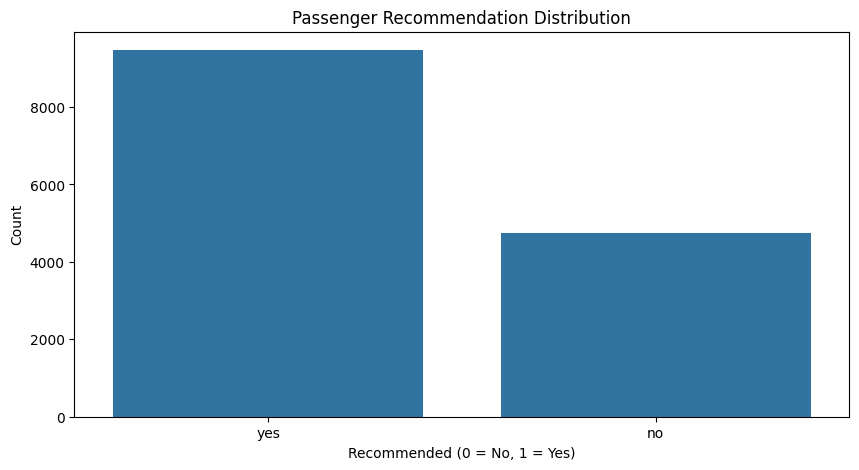

In [ ]:
#Countplot for Distribution of the Dependent Variable i.e. Recommended
plt.figure(figsize=(10, 5))
sns.countplot(x='recommended', data=df)
plt.title("Passenger Recommendation Distribution")
plt.xlabel("Recommended (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

### **Observation for Count plot for Distribution of recommended**

Here,a larger number of passengers have recommended the airline (yes) compared to those who haven't (no).
Distribution is imbalanced. Hence, biased.

2. Now, we analyse value_for_money parameter using Histogram to see how the customers rate the pricing of the flight.

In [ ]:
df['value_for_money'].unique()

array([5., 2., 3., 1., 4.])

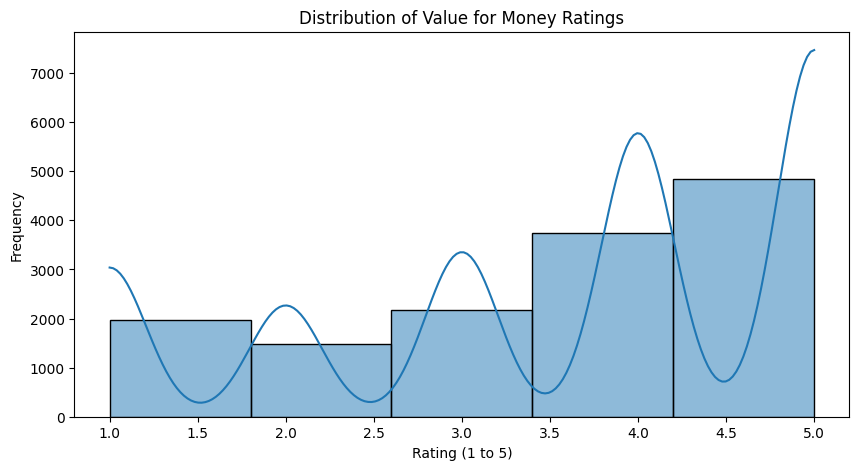

In [ ]:
#Histogram for value_for_money
plt.figure(figsize=(10, 5))
sns.histplot(df['value_for_money'], bins=5, kde=True)
plt.title("Distribution of Value for Money Ratings")
plt.xlabel("Rating (1 to 5)")
plt.ylabel("Frequency")
plt.show()

### **Observation for Histogram for value_for_money**

Here, most passengers have given a high rating for value - mainly for 4 and 5.
Some passengers have also given 1 or 2 ratings.


3.Next we analyse flight_month to see monthly distribution using count plot.

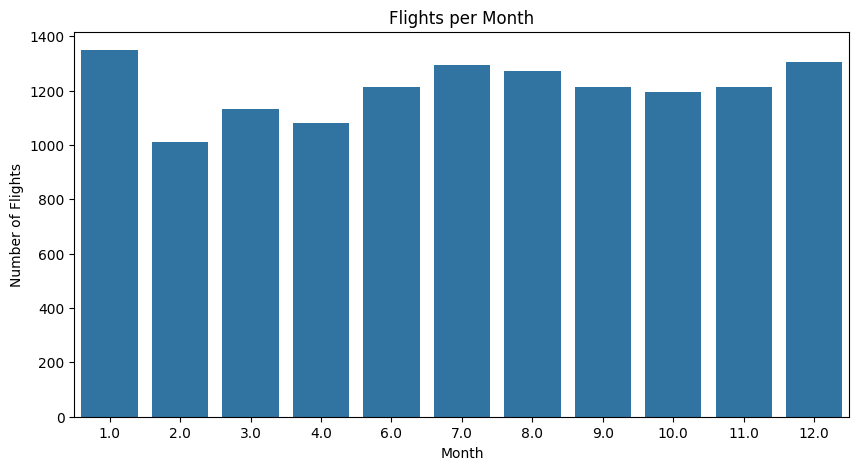

In [ ]:
#Count plot for flight_month
plt.figure(figsize=(10, 5))
sns.countplot(x='flight_month', data=df)
plt.title("Flights per Month")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.show()

### **Observation for Countplot for flight_month**

Here, Month 1 which is January, has the highest record in number of flights. Whereas, Month 2 i.e. February has seen the lowest record in number of flights.

4.We also have a column named as traveller_type. We can analyse this column to know the passenger type, as this can affect our dependent variable i.e. recommended. We will use Count plot for this.

In [ ]:
df['traveller_type'].unique()

array(['Solo Leisure', 'Couple Leisure', 'Business', 'Family Leisure',
       'Traveller'], dtype=object)

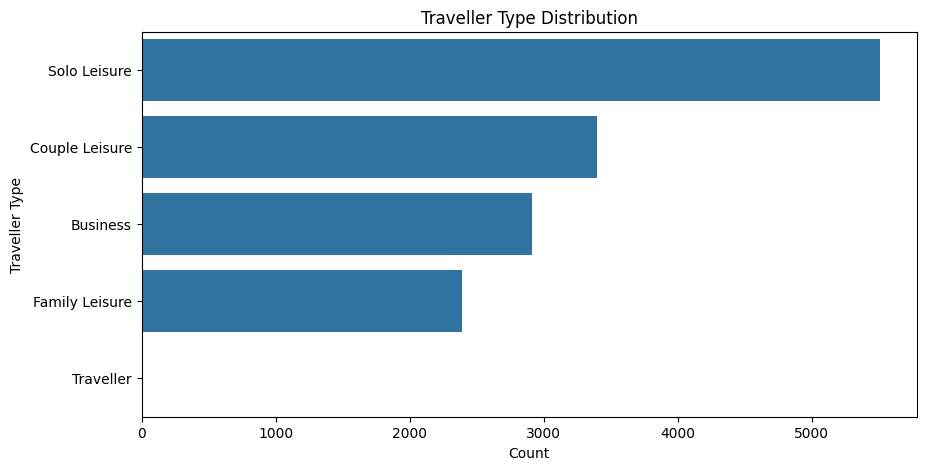

In [ ]:
#Count plot for traveller_type
plt.figure(figsize=(10,5))
sns.countplot(y='traveller_type', data=df, order=df['traveller_type'].value_counts().index)
plt.title("Traveller Type Distribution")
plt.xlabel("Count")
plt.ylabel("Traveller Type")
plt.show()

### **Observation for Count plot for traveller_type**

Here, we can clearly see that majority of travellers fly Solo.
Then, followed by couple or family. And, business type travellers are comparatively less in portion.

# **Bivariate Analysis**

1.We analyse Traveller Type vs Recommendation using count plot to see which types of travellers recommend yes or no to the airline.

For that firstly, we need to group 'recommended' and 'traveller_type' and  then plot the count plot.

In [ ]:
df['traveller_type'].unique()

array(['Solo Leisure', 'Couple Leisure', 'Business', 'Family Leisure',
       'Traveller'], dtype=object)

In [ ]:
type_recommend = df.groupby(['recommended', 'traveller_type']).count()

In [ ]:
type_recommend

airline  overall  review_date  aircraft  cabin  \
recommended traveller_type                                                   
no          Business           1160     1160         1160      1160   1160   
            Couple Leisure     1365     1365         1365      1365   1365   
            Family Leisure      848      848          848       848    848   
            Solo Leisure       1371     1371         1371      1371   1371   
yes         Business           1755     1755         1755      1755   1755   
            Couple Leisure     2035     2035         2035      2035   2035   
            Family Leisure     1542     1542         1542      1542   1542   
            Solo Leisure       4138     4138         4138      4138   4138   
            Traveller             1        1            1         1      1   

                            date_flown  seat_comfort  cabin_service  food_bev  \
recommended traveller_type                                                      
no          Business              1085          1160           1160      1160   
            Couple Leisure        1303          1365           1365      1365   
            Family Leisure         813           848            848       848   
            Solo Leisure          1278          1371           1371      1371   
yes         Business              1625          1755           1755      1755   
            Couple Leisure        1907          2035           2035      2035   
            Family Leisure        1440          1542           1542      1542   
            Solo Leisure          3825          4138           4138      4138   
            Traveller                1             1              1         1   

                            entertainment  ground_service  value_for_money  \
recommended traveller_type                                                   
no          Business                 1160            1160             1160   
            Couple Leisure           1365            1365             1365   
            Family Leisure            848             848              848   
            Solo Leisure             1371            1371             1371   
yes         Business                 1755            1755             1755   
            Couple Leisure           2035            2035             2035   
            Family Leisure           1542            1542             1542   
            Solo Leisure             4138            4138             4138   
            Traveller                   1               1                1   

                            sentiment  flight_year  flight_month  
recommended traveller_type                                        
no          Business             1160         1085          1085  
            Couple Leisure       1365         1303          1303  
            Family Leisure        848          813           813  
            Solo Leisure         1371         1278          1278  
yes         Business             1755         1625          1625  
            Couple Leisure       2035         1907          1907  
            Family Leisure       1542         1440          1440  
            Solo Leisure         4138         3825          3825  
            Traveller               1            1             1

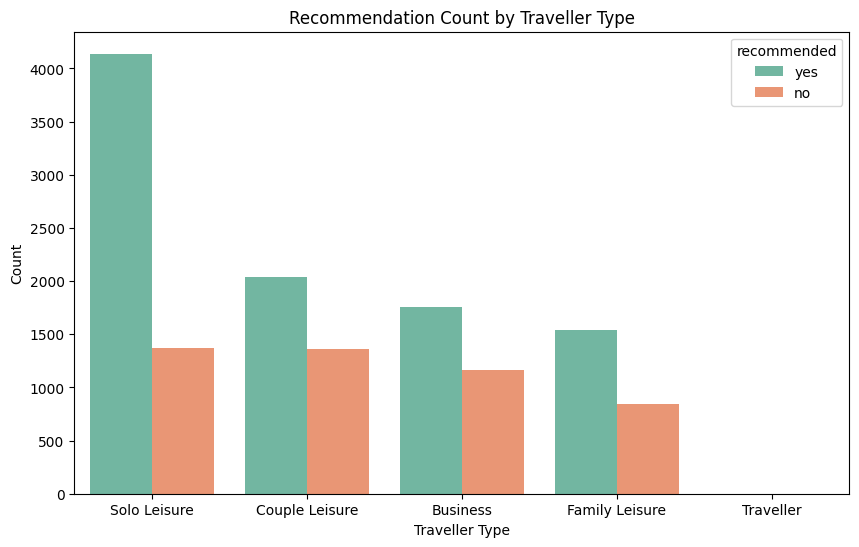

In [ ]:
#Count plot for 'traveller_type' Vs 'recommended'
plt.figure(figsize=(10, 6))
sns.countplot(x='traveller_type', hue='recommended', data=df, palette='Set2') #we use hue as it splits the bars into 2 colours.
plt.title("Recommendation Count by Traveller Type")
plt.xlabel("Traveller Type")
plt.ylabel("Count")
#plt.xticks(rotation=45)
plt.show()

### **Observation for Count plot for traveller_type Vs recommended**

Here, it is visible that, most of the Solo Leisure travellers recommended the airline(green bar is taller than orange).
Couple and Family Leisure travellers have a balanced split between yes and no recommendations.
Whereas, Business travellers are less likely to recommend.

2.We now analyse Cabin column Vs value_for_money column to identify how value vary across cabin column using boxplot.

We use box plot here because we are plotting 'cabin' which is categoric Vs 'value_for_money' which is numeric. Hence, boxplot.

In [ ]:
df['cabin'].unique()

array(['Economy Class', 'Business Class', 'First Class',
       'Premium Economy'], dtype=object)

In [ ]:
df['value_for_money'].unique()

array([5., 2., 3., 1., 4.])

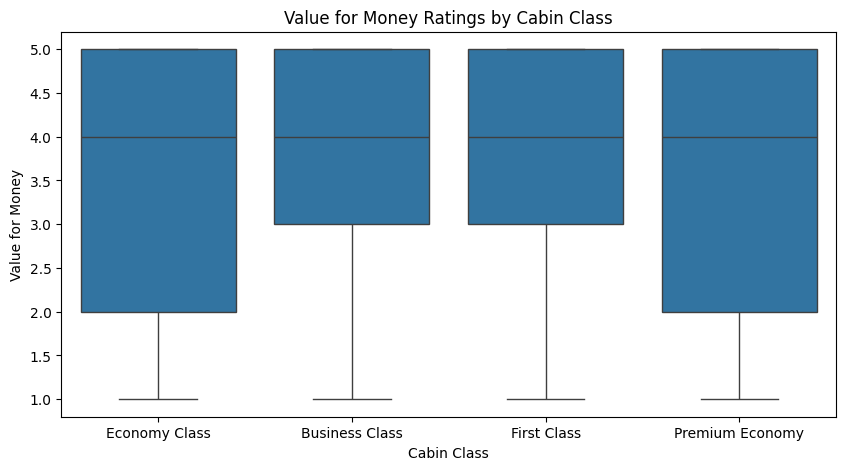

In [ ]:
#Boxplot for cabin Vs value_for_money
plt.figure(figsize=(10, 5))
sns.boxplot(x='cabin', y='value_for_money', data=df)
plt.title("Value for Money Ratings by Cabin Class")
plt.xlabel("Cabin Class")
plt.ylabel("Value for Money")
plt.show()

### **Observation for Box plot for cabin Vs value_for_money**

1.The thick line inside each box shows the median rating i.e. it's around 4.0 for all cabin classes.This interprets that on an average, passengers in all cabins feel they get good value for their ticket price.
2.Economy Class and Premium Economy have wide IQR, which means passenger opinions are highly varied in these cabins.
3.Business and First Class are Slightly more Consistent.
4.All Cabins Have Low-End Outliers i.e. rating as low as 1,indicating that disappointments happen at every price point.

3.We analyse flight Month Vs recommendation to detect seasonal trends using line plot, as line plots are used to see trends.

First we have to group 'flight_month' and 'recommended' column,and we calculate mean of 'recommended' for each month.

In [ ]:
df.head()

,airline,overall,review_date,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,flight_year,flight_month
0,Turkish Airlines,10.0,6th May 2019,A330,Solo Leisure,Economy Class,2019-04-01,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive,2019.0,4.0
1,Turkish Airlines,2.0,29th April 2019,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,2019-04-01,3.0,3.0,2.0,3.0,1.0,2.0,no,positive,2019.0,4.0
2,Turkish Airlines,6.0,29th April 2019,A320 / Boeing 737,Solo Leisure,Economy Class,2019-04-01,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive,2019.0,4.0
3,Turkish Airlines,1.0,28th April 2019,A320 / A330,Solo Leisure,Economy Class,2019-02-01,1.0,1.0,1.0,1.0,1.0,1.0,no,negative,2019.0,2.0
4,Turkish Airlines,2.0,24th April 2019,Boeing 777-300,Solo Leisure,Economy Class,2019-03-01,1.0,3.0,2.0,2.0,1.0,1.0,no,positive,2019.0,3.0


Before grouping, we need to convert 'recommended' into binary i.e. 1 or 0. Because 'recommend' consists string datatype, and we need numeric datatype.

In [ ]:
df['recommended'] = df['recommended'].map({'yes': 1, 'no': 0})

In [ ]:
monthly_recommend = df.groupby('flight_month')['recommended'].mean().reset_index()
monthly_recommend

,flight_month,recommended
0,1.0,0.625649
1,2.0,0.684836
2,3.0,0.696996
3,4.0,0.644177
4,6.0,0.665568
5,7.0,0.658423
6,8.0,0.655660
7,9.0,0.681219
8,10.0,0.651046
9,11.0,0.681518


### **Here output will show mean of a binary column.**

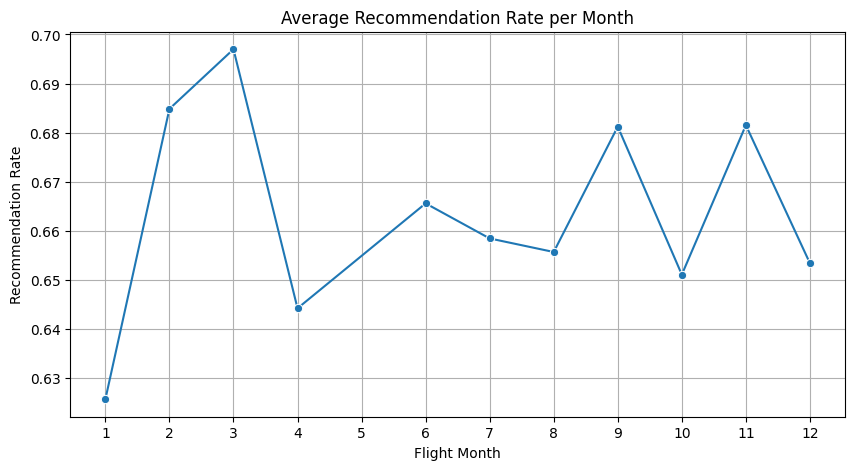

In [ ]:
#Line plot for 'flight_month' Vs'recommended'
plt.figure(figsize=(10,5))
sns.lineplot(x='flight_month', y='recommended', data=monthly_recommend, marker='o')
plt.title("Average Recommendation Rate per Month")
plt.xlabel("Flight Month")
plt.ylabel("Recommendation Rate")
plt.xticks(range(1,13))  #ensures the x-axis ticks are 1 through 12 (months).
plt.grid(True)
plt.show()

### **Observation for line plot for fligh_month Vs recommended**

1.March (Month 3) has the highest recommendation rate.
2.January (Month 1) has the lowest recommendation rate.
3.Sudden drop from March to April (Month 4).
4.Middle months(June, July, August) are relatively stable but slightly low.
5.Around September–November(Months 9–11),second highest in recommended.
6.Again, decrease in December(Month 12).


# **Multivariate Analysis**

In [ ]:
df.head()

,airline,overall,review_date,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,flight_year,flight_month
0,Turkish Airlines,10.0,6th May 2019,A330,Solo Leisure,Economy Class,2019-04-01,4.0,5.0,5.0,5.0,5.0,5.0,1,positive,2019.0,4.0
1,Turkish Airlines,2.0,29th April 2019,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,2019-04-01,3.0,3.0,2.0,3.0,1.0,2.0,0,positive,2019.0,4.0
2,Turkish Airlines,6.0,29th April 2019,A320 / Boeing 737,Solo Leisure,Economy Class,2019-04-01,2.0,3.0,3.0,3.0,3.0,3.0,1,positive,2019.0,4.0
3,Turkish Airlines,1.0,28th April 2019,A320 / A330,Solo Leisure,Economy Class,2019-02-01,1.0,1.0,1.0,1.0,1.0,1.0,0,negative,2019.0,2.0
4,Turkish Airlines,2.0,24th April 2019,Boeing 777-300,Solo Leisure,Economy Class,2019-03-01,1.0,3.0,2.0,2.0,1.0,1.0,0,positive,2019.0,3.0


In [ ]:
#Heatmap (Correlation Matrix)
#Select only numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

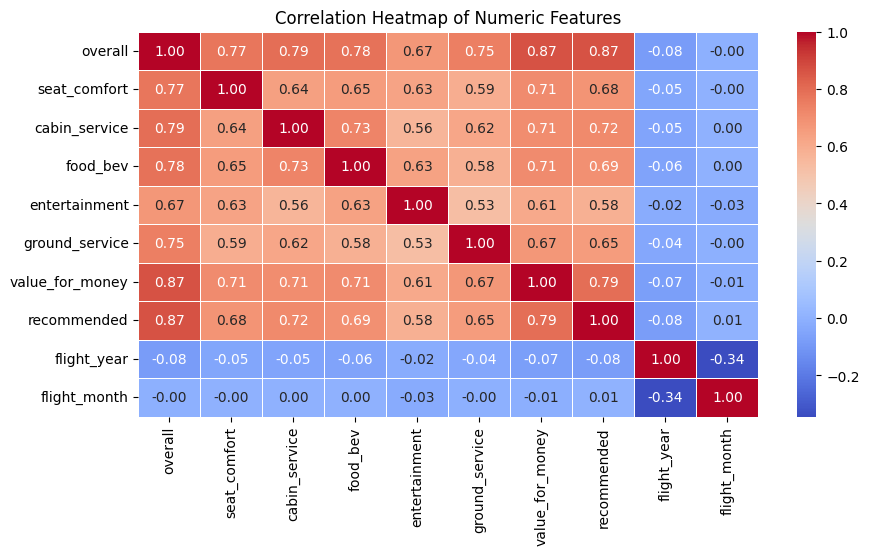

In [ ]:
#Compute correlation matrix
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# **Correlation Analysis**

The 'recommend' column has a positive correlation with other columns, except for 'flight_month' and 'flight_year',suggesting that recommendation is given more by experience than timing.

# **Outlier Treatment**

In [ ]:
#All numeric values
num_cols = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
            'ground_service', 'value_for_money']

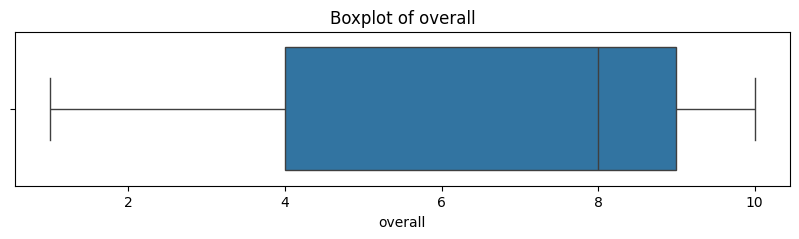

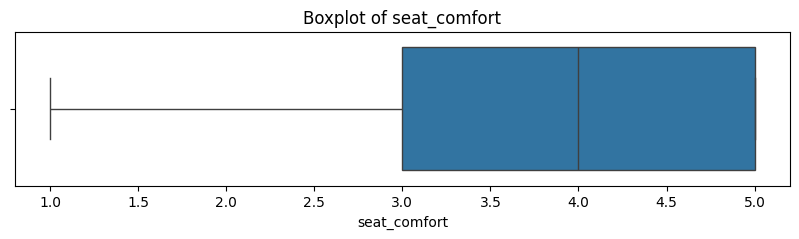

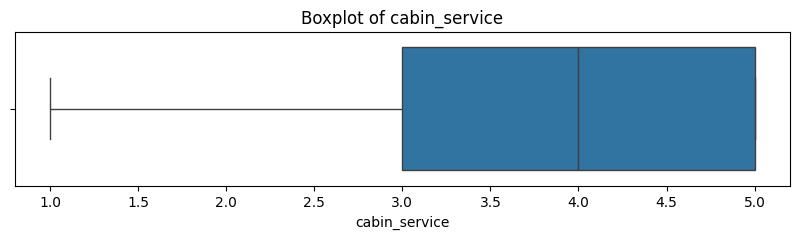

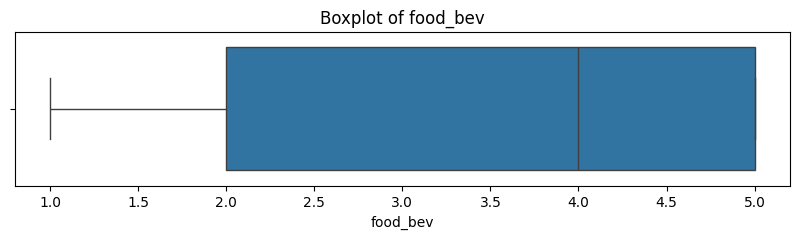

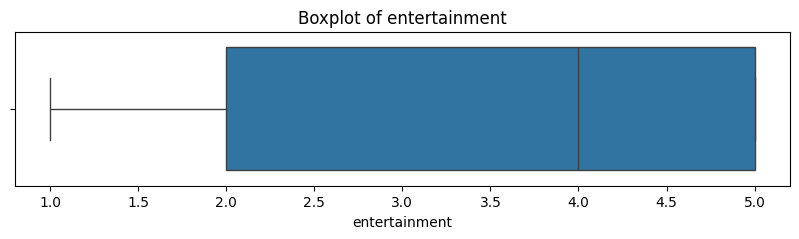

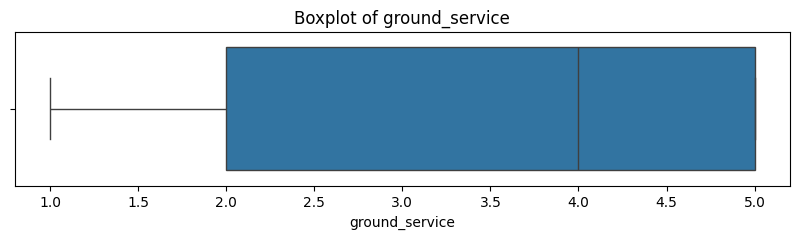

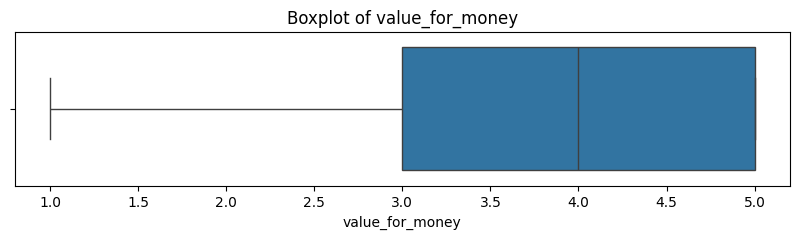

In [ ]:
for column in num_cols:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
df.head()

,airline,overall,review_date,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,flight_year,flight_month
0,Turkish Airlines,10.0,6th May 2019,A330,Solo Leisure,Economy Class,2019-04-01,4.0,5.0,5.0,5.0,5.0,5.0,1,positive,2019.0,4.0
1,Turkish Airlines,2.0,29th April 2019,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,2019-04-01,3.0,3.0,2.0,3.0,1.0,2.0,0,positive,2019.0,4.0
2,Turkish Airlines,6.0,29th April 2019,A320 / Boeing 737,Solo Leisure,Economy Class,2019-04-01,2.0,3.0,3.0,3.0,3.0,3.0,1,positive,2019.0,4.0
3,Turkish Airlines,1.0,28th April 2019,A320 / A330,Solo Leisure,Economy Class,2019-02-01,1.0,1.0,1.0,1.0,1.0,1.0,0,negative,2019.0,2.0
4,Turkish Airlines,2.0,24th April 2019,Boeing 777-300,Solo Leisure,Economy Class,2019-03-01,1.0,3.0,2.0,2.0,1.0,1.0,0,positive,2019.0,3.0


In [ ]:
for i in df.columns:
    print(i, "\n", len(df[i].unique()))
    print("--" * 40)

airline 
 81
--------------------------------------------------------------------------------
overall 
 10
--------------------------------------------------------------------------------
review_date 
 1456
--------------------------------------------------------------------------------
aircraft 
 1637
--------------------------------------------------------------------------------
traveller_type 
 5
--------------------------------------------------------------------------------
cabin 
 4
--------------------------------------------------------------------------------
date_flown 
 58
--------------------------------------------------------------------------------
seat_comfort 
 5
--------------------------------------------------------------------------------
cabin_service 
 5
--------------------------------------------------------------------------------
food_bev 
 5
--------------------------------------------------------------------------------
entertainment 
 5
------------------

# **One-hot Encoding**

In [ ]:
df = pd.get_dummies(df, columns = ['cabin','traveller_type','airline'])
df.head()

,overall,review_date,aircraft,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,...,airline_Turkish Airlines,airline_Ukraine International,airline_United Airlines,airline_Virgin America,airline_Vueling Airlines,airline_WOW air,airline_Wizz Air,airline_airBaltic,airline_easyJet,airline_flydubai
0,10.0,6th May 2019,A330,2019-04-01,4.0,5.0,5.0,5.0,5.0,5.0,...,True,False,False,False,False,False,False,False,False,False
1,2.0,29th April 2019,Boeing 737-800 / A330-300,2019-04-01,3.0,3.0,2.0,3.0,1.0,2.0,...,True,False,False,False,False,False,False,False,False,False
2,6.0,29th April 2019,A320 / Boeing 737,2019-04-01,2.0,3.0,3.0,3.0,3.0,3.0,...,True,False,False,False,False,False,False,False,False,False
3,1.0,28th April 2019,A320 / A330,2019-02-01,1.0,1.0,1.0,1.0,1.0,1.0,...,True,False,False,False,False,False,False,False,False,False
4,2.0,24th April 2019,Boeing 777-300,2019-03-01,1.0,3.0,2.0,2.0,1.0,1.0,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
df.shape

(14215, 104)

In [ ]:
df.columns

Index(['overall', 'review_date', 'aircraft', 'date_flown', 'seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'value_for_money',
       ...
       'airline_Turkish Airlines', 'airline_Ukraine International',
       'airline_United Airlines', 'airline_Virgin America',
       'airline_Vueling Airlines', 'airline_WOW air', 'airline_Wizz Air',
       'airline_airBaltic', 'airline_easyJet', 'airline_flydubai'],
      dtype='object', length=104)

In [ ]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
#We'll have to encode 'sentiment' column as well because it is a string.
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
df['sentiment']

,sentiment
0,1
1,1
2,1
3,0
4,1
...,...
14210,1
14211,1
14212,1
14213,1


In [ ]:
df['sentiment'].unique()

array([1, 0])

In [ ]:
df = df.drop(['review_date','flight_year','flight_month','date_flown','aircraft'], axis = 1)

In [ ]:
df.head()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,cabin_Business Class,...,airline_Turkish Airlines,airline_Ukraine International,airline_United Airlines,airline_Virgin America,airline_Vueling Airlines,airline_WOW air,airline_Wizz Air,airline_airBaltic,airline_easyJet,airline_flydubai
0,10.0,4.0,5.0,5.0,5.0,5.0,5.0,1,1,False,...,True,False,False,False,False,False,False,False,False,False
1,2.0,3.0,3.0,2.0,3.0,1.0,2.0,0,1,False,...,True,False,False,False,False,False,False,False,False,False
2,6.0,2.0,3.0,3.0,3.0,3.0,3.0,1,1,False,...,True,False,False,False,False,False,False,False,False,False
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,False,...,True,False,False,False,False,False,False,False,False,False
4,2.0,1.0,3.0,2.0,2.0,1.0,1.0,0,1,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14215 entries, 0 to 14214
Data columns (total 99 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   overall                            14215 non-null  float64
 1   seat_comfort                       14215 non-null  float64
 2   cabin_service                      14215 non-null  float64
 3   food_bev                           14215 non-null  float64
 4   entertainment                      14215 non-null  float64
 5   ground_service                     14215 non-null  float64
 6   value_for_money                    14215 non-null  float64
 7   recommended                        14215 non-null  int64  
 8   sentiment                          14215 non-null  int64  
 9   cabin_Business Class               14215 non-null  bool   
 10  cabin_Economy Class                14215 non-null  bool   
 11  cabin_First Class                  14215 non-null  boo

# **Model Preparation**

In [ ]:
x = df.drop(['recommended'], axis =1).values # Independent variable
y = df['recommended'].values # dependent variable

In [ ]:
x

array([[10.0, 4.0, 5.0, ..., False, False, False],
       [2.0, 3.0, 3.0, ..., False, False, False],
       [6.0, 2.0, 3.0, ..., False, False, False],
       ...,
       [1.0, 1.0, 1.0, ..., False, False, False],
       [10.0, 5.0, 5.0, ..., False, False, False],
       [5.0, 1.0, 1.0, ..., False, False, False]], dtype=object)

In [ ]:
y

array([1, 0, 1, ..., 0, 1, 0])

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

# **Scaling**

In [ ]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()'''

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()'

In [ ]:
'''x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)'''

'x_train = scaler.fit_transform(x_train)\nx_test = scaler.transform(x_test)'

In [ ]:
x_train

array([[2.0, 4.0, 4.0, ..., False, False, False],
       [7.0, 5.0, 4.0, ..., False, False, False],
       [4.0, 4.0, 4.0, ..., False, False, False],
       ...,
       [7.0, 3.0, 4.0, ..., False, False, False],
       [10.0, 5.0, 5.0, ..., False, False, False],
       [9.0, 5.0, 5.0, ..., False, False, False]], dtype=object)

In [ ]:
x_test

array([[1.0, 2.0, 1.0, ..., False, False, False],
       [8.0, 4.0, 5.0, ..., False, False, False],
       [1.0, 1.0, 2.0, ..., False, False, False],
       ...,
       [1.0, 3.0, 3.0, ..., False, False, False],
       [10.0, 5.0, 5.0, ..., False, False, False],
       [9.0, 5.0, 5.0, ..., False, False, False]], dtype=object)

# **Importing Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [ ]:
log.fit(x_train, y_train)

LogisticRegression()

In [ ]:
log_pred = log.predict(x_test)
log_pred

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
y_test

array([0, 1, 0, ..., 0, 1, 1])

### **Printing the Scores**

In [ ]:
print("Training Score: ", round(log.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(log.score(x_test, y_test)*100,2), "%")

Training Score:  95.25 %
Testing Score:  95.01 %


### **Confusion Matrix**

<Figure size 600x400 with 0 Axes>

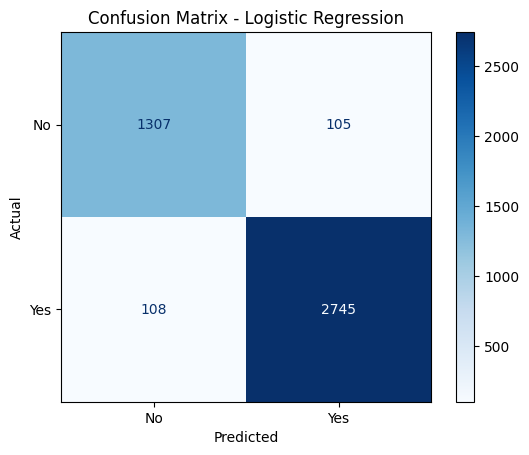

Accuracy       : 0.95
Error Rate     : 0.05
Precision (Yes): 0.96
Recall (Yes)   : 0.96
F1 Score (Yes) : 0.96


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, log_pred, labels=[0, 1])

#Plotting Confusion Matrix
plt.figure(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, log_pred)

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, log_pred, pos_label=1)
recall = recall_score(y_test, log_pred, pos_label=1)
f1 = f1_score(y_test, log_pred, pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### **Performing Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print("Training:", ((cross_val_score(log, x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(log, x_test, y_test))*100).mean().astype(int), "%")

Training: 95 %
Testing: 95 %


# **Importing Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_pred = dt.predict(x_test)
print("The Predicted values are: ", dt_pred)
print("The Actual values are: ", y_test)
print("--" * 40)

The Predicted values are:  [0 1 0 ... 0 1 1]
The Actual values are:  [0 1 0 ... 0 1 1]
--------------------------------------------------------------------------------


### **Printing the Scores**

In [ ]:
print("Training Score: ", round(dt.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(dt.score(x_test, y_test)*100,2), "%")

Training Score:  99.99 %
Testing Score:  93.48 %


### **Confusion Matrix**

<Figure size 600x400 with 0 Axes>

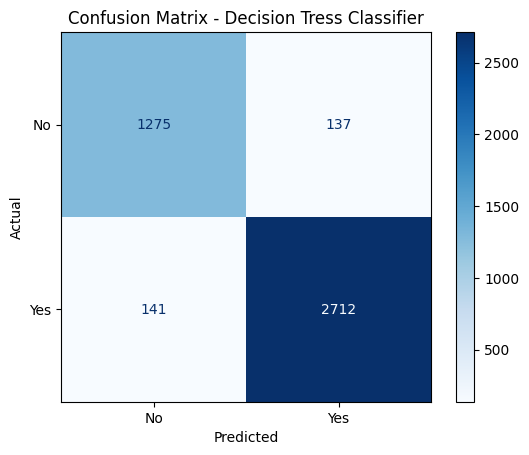

Accuracy       : 0.93
Error Rate     : 0.07
Precision (Yes): 0.95
Recall (Yes)   : 0.95
F1 Score (Yes) : 0.95


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, dt_pred, labels=[0, 1])

#Plotting Confusion Matrix
plt.figure(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Decision Tress Classifier")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, dt_pred)

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, dt_pred, pos_label=1)
recall = recall_score(y_test, dt_pred, pos_label=1)
f1 = f1_score(y_test, dt_pred, pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### **Performing Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print("Training:", ((cross_val_score(dt, x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(dt, x_test, y_test))*100).mean().astype(int), "%")

Training: 93 %
Testing: 93 %


# **Importing Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(x_test)
print("The Predicted values are: ", rfc_pred)
print("The Actual values are: ", y_test)
print("--" * 40)

The Predicted values are:  [0 1 0 ... 0 1 1]
The Actual values are:  [0 1 0 ... 0 1 1]
--------------------------------------------------------------------------------


### **Printing the Scores**

In [ ]:
print("Training Score: ", round(rfc.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(rfc.score(x_test, y_test)*100,2), "%")

Training Score:  99.99 %
Testing Score:  95.45 %


### **Confusion Matrix**

<Figure size 600x400 with 0 Axes>

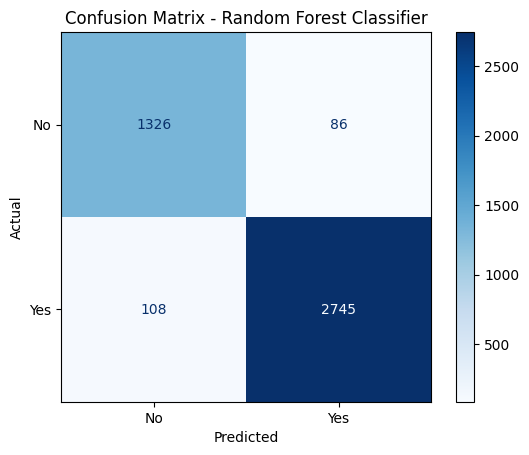

Accuracy       : 0.95
Error Rate     : 0.05
Precision (Yes): 0.97
Recall (Yes)   : 0.96
F1 Score (Yes) : 0.97


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, rfc_pred, labels=[0, 1])

#Plotting Confusion Matrix
plt.figure(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, rfc_pred)

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, rfc_pred, pos_label=1)
recall = recall_score(y_test, rfc_pred, pos_label=1)
f1 = f1_score(y_test, rfc_pred, pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### **Performing Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print("Training:", ((cross_val_score(rfc, x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(rfc, x_test, y_test))*100).mean().astype(int), "%")

Training: 95 %
Testing: 95 %


# **Importing Support Vector Machine Classifier**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [ ]:
svm_model_pred = svm_model.predict(x_test)
print("The Predicted values are: ", svm_model_pred)
print("The Actual values are: ", y_test)
print("--" * 40)

The Predicted values are:  [0 1 0 ... 0 1 1]
The Actual values are:  [0 1 0 ... 0 1 1]
--------------------------------------------------------------------------------


### **Printing the Score**

In [ ]:
print("Training Score: ", round(svm_model.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(svm_model.score(x_test, y_test)*100,2), "%")

Training Score:  95.37 %
Testing Score:  95.1 %


### **Confusion Matrix**

<Figure size 600x400 with 0 Axes>

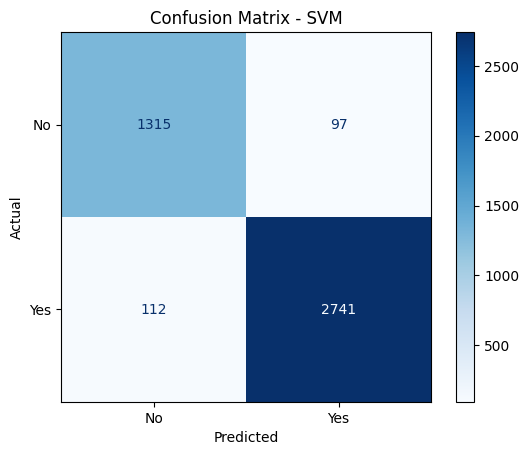

Accuracy       : 0.95
Error Rate     : 0.05
Precision (Yes): 0.97
Recall (Yes)   : 0.96
F1 Score (Yes) : 0.96


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, svm_model_pred, labels=[0, 1])

#Plotting Confusion Matrix
plt.figure(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - SVM")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, svm_model_pred)

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, svm_model_pred, pos_label=1)
recall = recall_score(y_test, svm_model_pred, pos_label=1)
f1 = f1_score(y_test, svm_model_pred, pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### **Performing Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print("Training:", ((cross_val_score(svm_model, x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(svm_model, x_test, y_test))*100).mean().astype(int), "%")

Training: 95 %
Testing: 95 %


# **Importing K Nearest Neighbor Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_model_pred = knn_model.predict(x_test)
print("The Predicted values are: ", svm_model_pred)
print("The Actual values are: ", y_test)
print("--" * 40)

The Predicted values are:  [0 1 0 ... 0 1 1]
The Actual values are:  [0 1 0 ... 0 1 1]
--------------------------------------------------------------------------------


### **Printing the Score**

In [ ]:
print("Training Score: ", round(knn_model.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(knn_model.score(x_test, y_test)*100,2), "%")

Training Score:  95.99 %
Testing Score:  94.65 %


### **Confusion Matrix**

<Figure size 600x400 with 0 Axes>

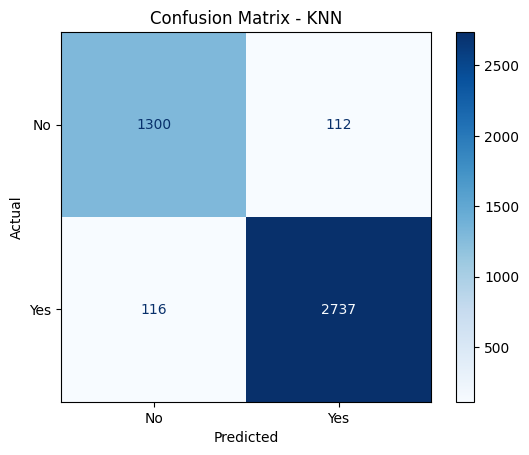

Accuracy       : 0.95
Error Rate     : 0.05
Precision (Yes): 0.96
Recall (Yes)   : 0.96
F1 Score (Yes) : 0.96


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, knn_model_pred, labels=[0, 1])

#Plotting Confusion Matrix
plt.figure(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - KNN")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, knn_model_pred)

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, knn_model_pred, pos_label=1)
recall = recall_score(y_test, knn_model_pred, pos_label=1)
f1 = f1_score(y_test, knn_model_pred, pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### **Performing Cross Validation**

In [ ]:
print("Training:", ((cross_val_score(knn_model, x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(knn_model, x_test, y_test))*100).mean().astype(int), "%")

Training: 94 %
Testing: 94 %


# **Printing all Scores using DataFrame**

In [ ]:
all_scores = pd.DataFrame({'Logistic Regression': ((log.score(x_train, y_train))*100, (log.score(x_test, y_test))*100),
                           'Decision Tress Classifier': ((dt.score(x_train, y_train))*100, (dt.score(x_test, y_test))*100),
                           'Random Forest Classifier': ((rfc.score(x_train, y_train))*100, (rfc.score(x_test, y_test))*100),
                           'Support Vector Machine Classifier': ((svm_model.score(x_train, y_train))*100, (svm_model.score(x_test, y_test))*100),
                           'K Nearest Neighbor Classifier': ((knn_model.score(x_train, y_train))*100, (knn_model.score(x_test, y_test))*100)})
all_scores.T.rename(columns = {0:'Training Score', 1 : 'Test Score'})

,Training Score,Test Score
Logistic Regression,95.246231,95.005862
Decision Tress Classifier,99.989950,93.481829
Random Forest Classifier,99.989950,95.451348
Support Vector Machine Classifier,95.366834,95.099648
K Nearest Neighbor Classifier,95.989950,94.654162


# **Final Conclusion**

1.)Logistic Regression performs very well on both training and testing data, and is not overfitting.
2.)Decision Tree Classifier has very high training accuracy, which means that the model fits perfectly to training data.But it's test accuracy is low,leading to overfitting.
3.)Random Forest Classifier has the best test accuracy among all models.
4.) Support Vector Machine Classifier is almost similar to Logistic Regression.
5.)K-Nearest Neighbor Classifier performs decently.

# **Best Model Recommendation**

Random Forest Classifier is the best recommended overall model due to its high accuracy. But, if you want Simplicity or Speed, then you can go with Logistic Regression or SVM.